# Portafolios de Inversión

Autor: Guillermo Izquierdo

Este código es para fines educativos exclusivamente


In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime as date
import matplotlib.pyplot as plt
import pyfolio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext watermark
%watermark
%watermark -p pandas_datareader,pandas,pyfolio

2019-02-21T02:39:37-06:00

CPython 3.6.3
IPython 6.1.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
pandas_datareader 0.7.0
pandas 0.20.3
pyfolio 0.9.0


In [ ]:
def get_Data(index):
    data = pdr.get_data_yahoo(index, start=startdate, end=enddate)
    return data

In [ ]:
startdate = date.datetime(2017, 1, 1)
enddate = date.datetime(2018, 1, 1)

In [ ]:
amzn = get_Data('AMZN')
tsla = get_Data('TSLA')
bac = get_Data('BAC')

amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
2017-01-09,801.770020,791.770020,798.000000,796.919983,3440100,796.919983


In [ ]:
for stock in (amzn,tsla,bac):
    stock['Returns'] = stock['Adj Close'] / stock['Adj Close'].iloc[0]


In [ ]:
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983,1.000000
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993,1.004657
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012,1.035533
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990,1.056152
2017-01-09,801.770020,791.770020,798.000000,796.919983,3440100,796.919983,1.057386


In [ ]:
for stock, allocation in zip((amzn,tsla,bac),[.2,.4,.4]):
    stock['Allocation'] = stock['Returns'] * allocation

amzn.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation
Date,,,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983,1.000000,0.200000
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993,1.004657,0.200931
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012,1.035533,0.207107
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990,1.056152,0.211230
2017-01-09,801.770020,791.770020,798.000000,796.919983,3440100,796.919983,1.057386,0.211477


In [ ]:
for stock in (amzn,tsla,bac):
    stock['Position'] = stock['Allocation'] * 1000

amzn.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Allocation,Position
Date,,,,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983,1.000000,0.200000,200.000000
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993,1.004657,0.200931,200.931445
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012,1.035533,0.207107,207.106567
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990,1.056152,0.211230,211.230382
2017-01-09,801.770020,791.770020,798.000000,796.919983,3440100,796.919983,1.057386,0.211477,211.477172


In [ ]:
portafolio = pd.concat([amzn['Position'],tsla['Position'],bac['Position']], axis=1)
portafolio.columns = ['AMZN','TSLA','BAC']
portafolio.head()

,AMZN,TSLA,BAC
Date,,,
2017-01-03,200.000000,400.000000,400.000000
2017-01-04,200.931445,418.434029,407.456714
2017-01-05,207.106567,417.991602,402.663142
2017-01-06,211.230382,422.157682,402.663142
2017-01-09,211.477172,426.342215,400.355037


In [ ]:
portafolio_total = portafolio.sum(axis=1)
portafolio_total.head()

Date
2017-01-03    1000.000000
2017-01-04    1026.822187
2017-01-05    1027.761311
2017-01-06    1036.051206
2017-01-09    1038.174423
dtype: float64

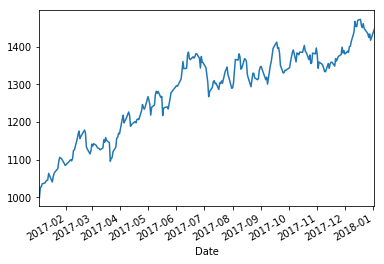

In [ ]:
portafolio_total.plot()
plt.show()

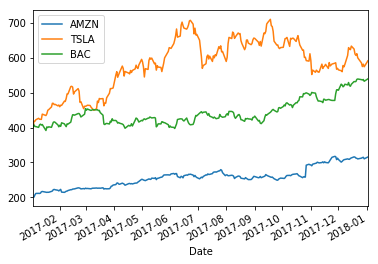

In [ ]:
portafolio.plot()
plt.show()

In [ ]:
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2017-01-04    0.026822
2017-01-05    0.000915
2017-01-06    0.008066
2017-01-09    0.002049
2017-01-10    0.003905
dtype: float64

Start date,2017-01-04
End date,2018-01-02
Total months,11
,Backtest
Annual return,44.8%
Cumulative returns,44.6%
Annual volatility,19.6%
Sharpe ratio,1.99
Calmar ratio,5.24
Stability,0.84
Max drawdown,-8.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.55,2017-06-14,2017-07-06,2017-09-14,67
1,7.02,2017-02-21,2017-03-21,2017-04-03,30
2,5.79,2017-09-18,2017-09-25,2017-12-08,60
3,5.03,2017-05-10,2017-05-17,2017-05-30,15
4,3.87,2017-05-01,2017-05-04,2017-05-09,7


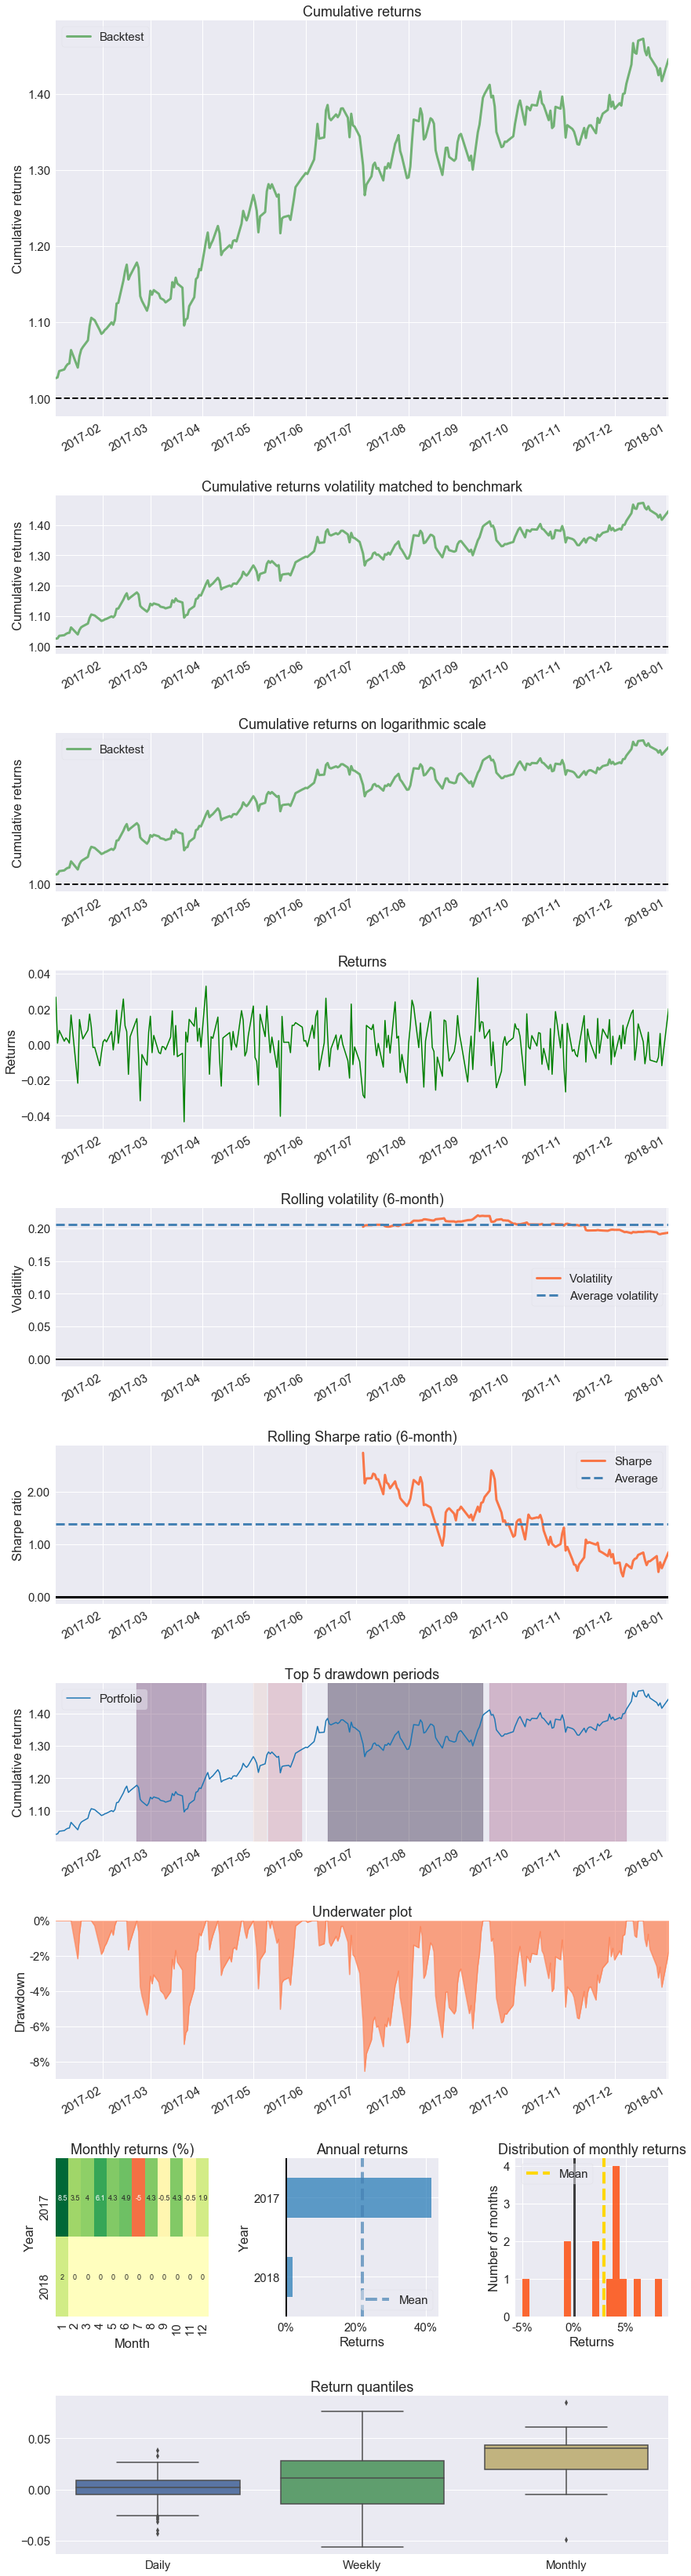

In [ ]:

benchmark = spy['Adj Close']
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark SP500')
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

pyfolio.create_returns_tear_sheet(portafolio_returns)

# Portafolios de inversión parte 2

In [ ]:
import numpy as np
rets = np.log(portafolio / portafolio.shift(1)).dropna()
print(rets.head())

                AMZN      TSLA       BAC
Date                                    
2017-01-04  0.004646  0.045055  0.018470
2017-01-05  0.030270 -0.001058 -0.011834
2017-01-06  0.019716  0.009918  0.000000
2017-01-09  0.001168  0.009863 -0.005749
2017-01-10 -0.001281 -0.006115  0.017147


In [ ]:
mean = rets.mean() * 252
print(mean)

AMZN    0.457738
TSLA    0.391679
BAC     0.299878
dtype: float64


In [ ]:
covariance = rets.cov() *252
print(covariance)

          AMZN      TSLA       BAC
AMZN  0.042191  0.015815  0.003989
TSLA  0.015815  0.125657  0.005658
BAC   0.003989  0.005658  0.046098


In [ ]:
weights = np.random.random(3)
print(weights)
weights = weights / np.sum(weights)
print(weights.sum())

[0.27991467 0.51459258 0.14425354]
1.0


In [ ]:
exp_ret = np.sum(rets.mean() * weights) *252
print(exp_ret)

0.39726953241912893


In [ ]:
exp_cov = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
print(exp_cov)

0.04908566169773054


In [ ]:
exp_std = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
print(exp_std)

0.22155284177308704


# Simulación Montecarlo 

In [ ]:
prets = []
pvols = []

for p in range(3000):
    weights = np.random.random(3)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) *252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

print(prets[:5])
print(pvols[:5])

[0.37629694 0.43572705 0.35527103 0.39010731 0.39405688]
[0.19174931 0.19162395 0.17591899 0.21649199 0.22641283]


![title](sharpe.jpg)

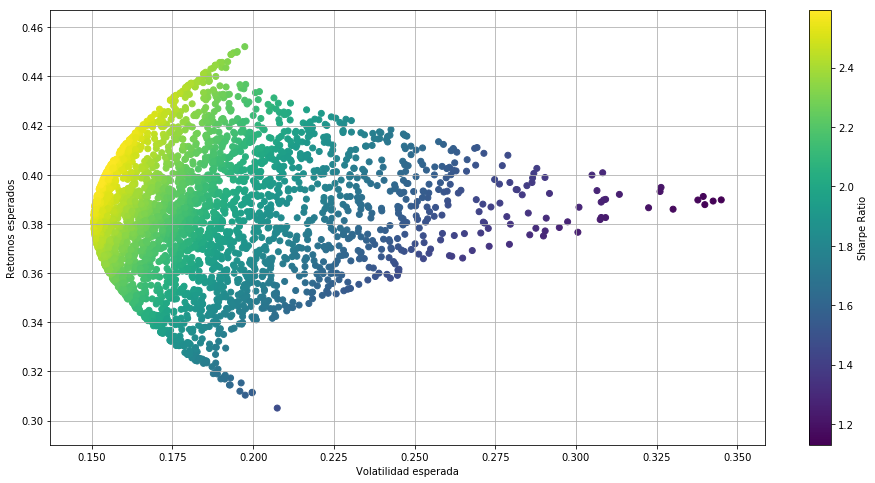

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap ='plasma' , label = 'Sharpe Ratio')
plt.show()

# Optimización de Portafolio 

In [ ]:
def pstats(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) *252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret,pvol, pret/pvol])
    

In [ ]:
import scipy.optimize as sco
def min_sharpe(weights):
    return -pstats(weights)[2]


In [ ]:
cons = ({'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
bnds = tuple((0,1) for x in range(3))


In [ ]:
opts = sco.minimize(min_sharpe, 3 * [1. / 3], method = 'SLSQP', bounds = bnds, constraints = cons)

In [ ]:
print(opts)

     fun: -2.594326764172962
     jac: array([ 0.00076273, -0.00194752, -0.00077063])
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.57767891, 0.09781134, 0.32450975])


In [ ]:
sharpe_opt = pstats(opts['x']).round(3)
print(sharpe_opt)

[0.4   0.154 2.594]


In [ ]:
def min_var(weights):
    return pstats(weights)[1] ** 2

In [ ]:
optv = sco.minimize(min_var, 3 * [1. / 3], method = 'SLSQP', bounds = bnds, constraints = cons)
print(optv)

     fun: 0.022675084588606936
     jac: array([0.0453508 , 0.04533645, 0.04535273])
 message: 'Optimization terminated successfully.'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.4572494 , 0.10305042, 0.43970018])


In [ ]:
var_opt = pstats(optv['x']).round(3)
print(var_opt)

[0.382 0.151 2.534]


In [ ]:
cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
        
bnds = tuple((0,1) for x in weights)

In [ ]:
def min_func_portafolio(weights):
    return pstats(weights)[1]

In [ ]:
trets = np.linspace(0.30,0.46,50)
tvols = []
for tret in trets:
    cons = ({'type' :'eq', 'fun' : lambda x: pstats(x)[0] - tret },
        {'type' :'eq', 'fun' : lambda x: np.sum(x) - 1 })
    res = sco.minimize(min_func_portafolio, 3 *[1. / 3], method='SLSQP', bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

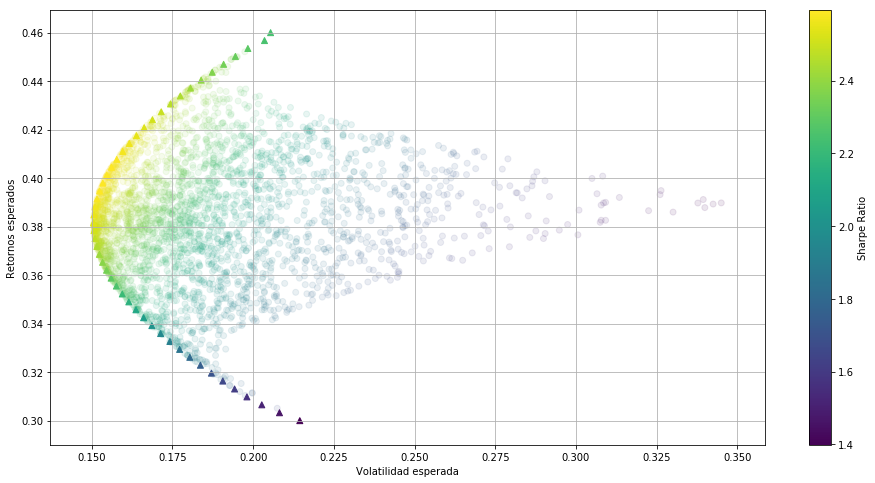

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', alpha = 0.1)
plt.scatter(tvols, trets, c=trets / tvols , marker = '^', edgecolors='face')
plt.grid(True)
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retornos esperados')
plt.colorbar(cmap = 'inferno', label = 'Sharpe Ratio')
plt.show()